# European Call Options

## Important notes

Approach used in paper is used with LogNormal Distribution. The authors suggest use of qGAN (quantum Generative Adverserial Networks) for real life applications.

## How to use BSM approach

1. Set number ($n$) of $ 2^{n}$ discrete qubits.
2. Set parameters of LogNormal Distribution.
3. Set lower and upper boundaries for variable, that follows LogNormal Distribution.
4. Map probabilities from normal to log-normal reference, using `scipy.stats.multivariate_normal.pdf`
5. Create LogNormal Distribution.
6. Use $\sqrt {P(x)}$ as qubits amplitudes.
6. Use that distribution with Amplitude Estimation.
7. Extract solution using $Q^{n}$ operators, and ancilla qubits.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import Aer, QuantumCircuit
from qiskit.algorithms import IterativeAmplitudeEstimation
from qiskit_finance.circuit.library import LogNormalDistribution
from qiskit.circuit.library import LinearAmplitudeFunction

In [2]:
# number of qubits to represent the uncertainty
num_uncertainty_qubits = 3

# parameters for considered random distribution
S = 2.0       # initial spot price
vol = 0.1     # volatility of 10%
r = 0.04      # annual interest rate of 4%
T = 300 / 365  # 300 days to maturity

# resulting parameters for log-normal distribution
mu = ((r - 0.5 * vol**2) * T + np.log(S))
sigma = vol * np.sqrt(T)
mean = np.exp(mu + sigma**2/2)
variance = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
stddev = np.sqrt(variance)

# lowest and highest value considered for the spot price; in between, an equidistant discretization is considered.
# in paper these values are used arbitrarly
low  = 1.5
high = 2.5

# construct A operator for QAE for the payoff function by
# composing the uncertainty model and the objective
uncertainty_model = LogNormalDistribution(num_uncertainty_qubits, mu=mu, sigma=sigma**2, bounds=(low, high))

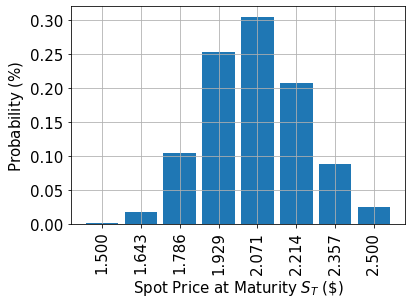

In [3]:
# plot probability distribution
x = uncertainty_model.values
y = uncertainty_model.probabilities
plt.bar(x, y, width=0.12)
plt.xticks(x, size=15, rotation=90)
plt.yticks(size=15)
plt.grid()
plt.xlabel('Spot Price at Maturity $S_T$ (\$)', size=15)
plt.ylabel('Probability ($\%$)', size=15)
plt.show()